---

Universidade Federal do Rio Grande do Norte

Centro de Tecnologia

Departamento de Engenharia de Computação e Automação

ELE0606 - Tópicos especiais em inteligência artificial

Student: Levy Gabriel da Silva Galvão

Título: Neural Network with Multilayer Perceptron

---

# Libraries import

In [237]:
# Data manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import tensorflow as tf

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, \
                            confusion_matrix, \
                            classification_report

# Dataset

The objective of this analysis is to apply a nerural network with the multilayer perceptron classifier on to two different datasets using the Keras API with Tensorflow library. Furthermore comparing the results with other machine learning models.

The first dataset is the Wine dataset (https://archive.ics.uci.edu/ml/datasets/wine) that contains the information about 13 feature attributes that links to three different classes of wine. The attributes are listed below:

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash  
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline   

Each class has the following number of instances (that will be later confirmed by plot):

- class 1: 59
- class 2: 71
- class 3: 48

The second dataset is the Synthetic Control Chart Time Series (https://archive.ics.uci.edu/ml/datasets/synthetic+control+chart+time+series). This dataset contains 600 examples of control charts synthetically generated by the process in Alcock and Manolopoulos (1999) and each chart with 60 samples (that becomes each attribute column). There are six different classes of control charts:

1. Normal: 100;
2. Cyclic: 100;
3. Increasing trend: 100;
4. Decreasing trend: 100;
5. Upward shift: 100;
6. Downward shift: 100;

Each class is divided by order of appearence in the number of occurrences is 100 samples for each class. The targets are not explicity defined, so they need to be set after loading the dataset. But a simple line plot of each sample can show the clear difference and degree of belonging to each class.


For the wine dataset:

In [5]:
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df_wine = pd.read_csv(filename, header=None)
df_wine.columns = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 
              'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 
              'color_intensity', 'hue', 'OD280/OD315_of_diluted_wines', 'proline']
df_wine['target'] = df_wine['target'].astype(str)

For the synthetic control chart time series:

In [6]:
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/synthetic_control-mld/synthetic_control.data'
df_ctrl = pd.read_csv(filename, header=None, delim_whitespace=True)
repeat_num = 100
df_ctrl['target'] = pd.Series(np.concatenate((
                              np.repeat('normal',repeat_num),
                              np.repeat('cyclic',repeat_num),
                              np.repeat('increasing_trend',repeat_num),
                              np.repeat('decreasing_trend',repeat_num),
                              np.repeat('upward_shift',repeat_num),
                              np.repeat('downward_shift',repeat_num),
                              ), axis=0))

The strategy for building the the models to train is:

1. Split the train and test set;
2. Use the standard scaler into the feature matrix of train and test set;
3. Applyt One Hot Encoder to the targets so each class can be represented as a binary vector regarding the original number or string;
4. Instantiate the architecture of the NN model;
5. Compile the model using the Adam optimizer;
6. Fit the model;
7. Evaluate the model with the summary, classification report and the confusion matrix with attention to the accuracy.

# Wine dataset analysis

The dataset was split in a 80%/20% fashion for train and test set.

In [239]:
train, test = train_test_split(df_wine, train_size=0.8, random_state=42, shuffle=True)

X_train = np.array(train.drop(columns=['target']))
y_train = np.array(train['target']).reshape(-1,1)

X_test = np.array(test.drop(columns=['target']))
y_test = np.array(test['target'], dtype=np.int).ravel()

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ohe = OneHotEncoder()
y_train_ohe = ohe.fit_transform(y_train).toarray()

Then the model is built and trained. Furthermore the summary of the layers in the model is shown, so as the classification report and the confusion matrix.

Model: "sequential_108"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_376 (Dense)           (None, 5)                 70        
                                                                 
 dense_377 (Dense)           (None, 3)                 18        
                                                                 
 dense_378 (Dense)           (None, 3)                 12        
                                                                 
 dense_379 (Dense)           (None, 3)                 12        
                                                                 
Total params: 112
Trainable params: 112
Non-trainable params: 0
_________________________________________________________________
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00

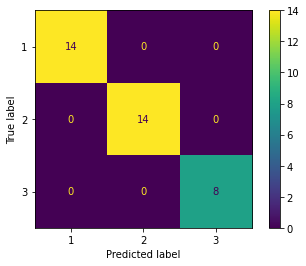

In [246]:
classes = list(df_wine['target'].unique())

clf = tf.keras.Sequential([
  tf.keras.layers.Dense(5, activation=tf.nn.relu, dtype= 'float64', input_dim=X_train.shape[1]),
  tf.keras.layers.Dense(3, activation=tf.nn.relu, dtype= 'float64'),
  tf.keras.layers.Dense(3, activation=tf.nn.relu, dtype= 'float64'),
  tf.keras.layers.Dense(len(classes), activation=tf.nn.softmax, dtype= 'float64'),
])

clf.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003), 
            loss=tf.keras.losses.BinaryCrossentropy(),
            metrics=[tf.keras.metrics.BinaryAccuracy(),
                     tf.keras.metrics.FalseNegatives()])
clf.summary()
history = clf.fit(x=X_train, y=y_train_ohe, epochs=30, workers=-1, verbose=0)

y_pred = np.argmax(clf.predict(X_test), axis=1)+1
print(classification_report(y_test, y_pred, zero_division=1))

classes = list(df_wine['target'].unique())
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

That is some goods results regarding the Wine dataset with accuracy of 100%. Recalling previous ML models results with same train test split ratio, resulting in accuracies of: 97.2% for KNN, 100% for naive Bayes, 94.4% for decision tree and 100% for random forest.

Different architectures of neural network may results in different accuracies, but this simples model with 3 hidden layers plus the output and input layer has shown promissing results.

Below some evaluation plots are shown, showing the evolution of the accuracy (rising) and training loss (falling) for each epoch. The accuracy suffered to improve in the first 10 epochs, but right after it took a steep curve until stagnate close to the final value.

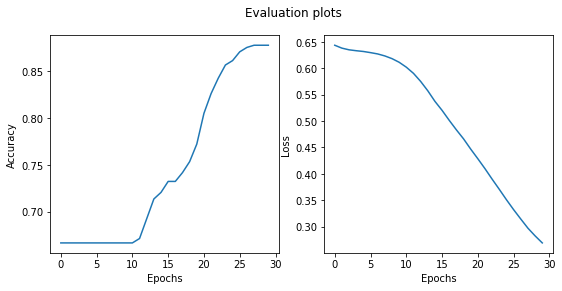

In [262]:
fig, ax = plt.subplots(1, 2, figsize=(9,4))
ax[0].plot(history.history['binary_accuracy'])
ax[1].plot(history.history['loss'])
fig.suptitle('Evaluation plots')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss');

# Control dataset analysis

The dataset was split in a 80%/20% fashion for train and test set.

In [263]:
train, test = train_test_split(df_ctrl, train_size=0.8, random_state=42, shuffle=True)

X_train = np.array(train.drop(columns=['target']))
y_train = np.array(train['target']).reshape(-1,1)

X_test = np.array(test.drop(columns=['target']))
y_test = np.array(test['target']).ravel()

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ohe = OneHotEncoder()
y_train_ohe = ohe.fit_transform(y_train).toarray()

Then the model is built and trained. Furthermore the summary of the layers in the model is shown, so as the classification report and the confusion matrix.

Model: "sequential_110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_384 (Dense)           (None, 5)                 305       
                                                                 
 dense_385 (Dense)           (None, 3)                 18        
                                                                 
 dense_386 (Dense)           (None, 3)                 12        
                                                                 
 dense_387 (Dense)           (None, 6)                 24        
                                                                 
Total params: 359
Trainable params: 359
Non-trainable params: 0
_________________________________________________________________
                  precision    recall  f1-score   support

          cyclic       1.00      1.00      1.00        20
decreasing_trend       1.00      1.00      1.00        17
  downward_

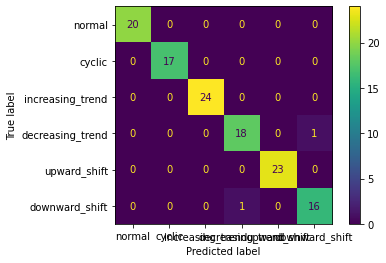

In [265]:
classes = list(df_ctrl['target'].unique())

clf = tf.keras.Sequential([
  tf.keras.layers.Dense(5, activation=tf.nn.relu, dtype= 'float64', input_dim=X_train.shape[1]),
  tf.keras.layers.Dense(3, activation=tf.nn.relu, dtype= 'float64'),
  tf.keras.layers.Dense(3, activation=tf.nn.relu, dtype= 'float64'),
  tf.keras.layers.Dense(len(classes), activation=tf.nn.softmax, dtype= 'float64'),
])

clf.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003), 
            loss=tf.keras.losses.BinaryCrossentropy(),
            metrics=[tf.keras.metrics.BinaryAccuracy(),
                     tf.keras.metrics.FalseNegatives()])
clf.summary()
history = clf.fit(x=X_train, y=y_train_ohe, epochs=30, workers=-1, verbose=0)

y_pred = np.argmax(clf.predict(X_test), axis=1)+1
y_pred_ohe = ohe.inverse_transform(np.eye(np.max(y_pred-1) + 1)[y_pred-1])
print(classification_report(y_test, y_pred_ohe, zero_division=1))

classes = list(df_ctrl['target'].unique())
cm = confusion_matrix(y_test, y_pred_ohe)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

This dataset used the same model as the previous dataset, also showing good results with 98% of accuracy. Recalling previous ML models results with same train test split ratio, resulting in accuracies of: 96.6% for KNN, 95% for naive Bayes, 86.6% for decision tree and 97.5% for random forest.

Different architectures of neural network may results in different accuracies, but this simples model with 3 hidden layers plus the output and input layer has shown promissing results.

Below some evaluation plots are shown, showing the evolution of the accuracy (rising) and training loss (falling) for each epoch. The accuracy stagnated between 5 and 20 epochs, but right after it took a steep curve to the final value.

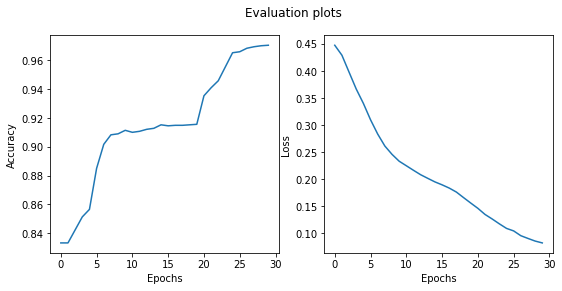

In [266]:
fig, ax = plt.subplots(1, 2, figsize=(9,4))
ax[0].plot(history.history['binary_accuracy'])
ax[1].plot(history.history['loss'])
fig.suptitle('Evaluation plots')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss');

# Extra section - news classification

This extra section will make use of the MLP classifier to expand the classification of news reports of a previous work. The objective is to apply the analysis for a higher number of classses ($>8$).

First we load the `fetch_20newsgroups` to check which categories to choose.

In [274]:
fetch_20newsgroups().target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

The categories that will be used are:

In [288]:
categories = ['comp.graphics','comp.os.ms-windows.misc',
              'comp.sys.ibm.pc.hardware','comp.sys.mac.hardware',
              'comp.windows.x','talk.politics.guns','talk.politics.mideast',
              'talk.politics.misc','talk.religion.misc']

The next step is to load the train and test set for the chosen categories.

In [289]:
train = fetch_20newsgroups(subset='train',categories=categories,shuffle=True,random_state=42)
test = fetch_20newsgroups(subset='test',categories=categories,shuffle=True,random_state=42)

The feature extraction is made using the TF-IDF:

In [305]:
tfidf_transformer = TfidfVectorizer(max_features = 1000)
X_train = tfidf_transformer.fit_transform(train.data).toarray()
X_test = tfidf_transformer.transform(test.data).toarray()

The train target is encoded with a One Hot Encoder so each class is represented as a binary array to facilitate the training of the MLP model.

In [349]:
ohe = OneHotEncoder()
y_train = ohe.fit_transform(train.target.reshape(-1,1)).toarray()
y_test = ohe.transform(test.target.reshape(-1,1)).toarray()

After this, the model can me built, compiled, trained and evaluated:

Model: "sequential_129"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_466 (Dense)           (None, 500)               500500    
                                                                 
 dense_467 (Dense)           (None, 100)               50100     
                                                                 
 dense_468 (Dense)           (None, 100)               10100     
                                                                 
 dense_469 (Dense)           (None, 9)                 909       
                                                                 
Total params: 561,609
Trainable params: 561,609
Non-trainable params: 0
_________________________________________________________________
              precision    recall  f1-score   support

           0       0.63      0.69      0.66       389
           1       0.67      0.64      0.66       394
           2   

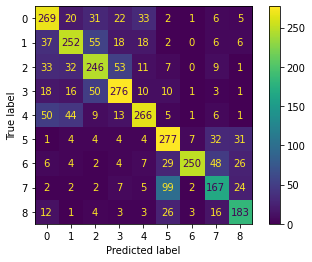

In [360]:
classes = list(np.unique(train.target))

clf = tf.keras.Sequential([
  tf.keras.layers.Dense(500, activation=tf.nn.relu, dtype= 'float64', input_dim=X_train.shape[1]),
  tf.keras.layers.Dense(100, activation=tf.nn.relu, dtype= 'float64'),
  tf.keras.layers.Dense(100, activation=tf.nn.relu, dtype= 'float64'),
  tf.keras.layers.Dense(len(classes), activation=tf.nn.softmax, dtype= 'float64'),
])

clf.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003), 
            loss=tf.keras.losses.BinaryCrossentropy(),
            metrics=[tf.keras.metrics.BinaryAccuracy(),
                     tf.keras.metrics.FalseNegatives()])
clf.summary()

history = clf.fit(x=X_train, y=y_train, epochs=20, workers=-1, verbose=0)

y_pred = np.argmax(clf.predict(X_test), axis=1)
print(classification_report(test.target, y_pred, zero_division=0))

cm = confusion_matrix(test.target, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

As seen above the test accuracy is very low, close to 67%, but when the model is evaluated below, the test accuracy is obtained as 92% with a 46% of loss. This divergence might be a mislead in the One Hot Encoding.

In [361]:
results = clf.evaluate(X_test, y_test, verbose=0)
print("Test loss:" + str(results[0]))
print("Test accuracy: " + str(results[1]))
print("false negatives: " + str(results[2]))

Test loss:0.4691598117351532
Test accuracy: 0.9278939366340637
false negatives: 1085.0


Despite the results, the evaluation plots with the history of the training shows a rising accuracy up to 99% and above and a loss close to 0.

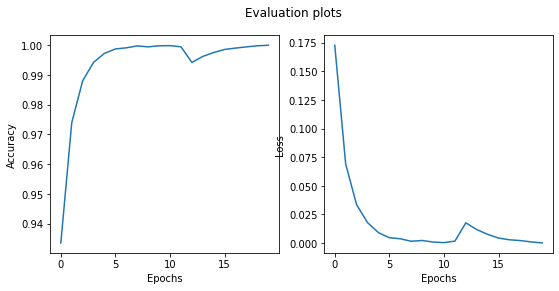

In [362]:
fig, ax = plt.subplots(1, 2, figsize=(9,4))
ax[0].plot(history.history['binary_accuracy'])
ax[1].plot(history.history['loss'])
fig.suptitle('Evaluation plots')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss');

Those results show that the MLP classifier has good results regarding text data.